# Drugs and Medical Conditions

**Author**: Lerato Ashler Riba <br>
**Date** : 14 April 2023 <br>
**Source**: https://www.kaggle.com/datasets/jithinanievarghese/drugs-related-to-common-treatments <br>
**Github URL**: https://github.com/LeratoRiba/LearningFromData/blob/main/DrugsRelatedToMeducalConditions.ipynb <br>

## This is for Loading The Data

In [13]:
import pandas as pd 
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [40]:
dataset = pd.read_csv("drugs_for_common_treatments.csv")

In [39]:
dataset.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41%,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39%,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....


In [20]:
dataset.drop(['medical_condition_description','medical_condition_url','drug_link'], axis=1)

,drug_name,medical_condition,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews
0,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0
1,spironolactone,Acne,82%,Rx,C,N,X,7.2,449.0
2,minocycline,Acne,48%,Rx,D,N,NaN,5.7,482.0
3,Accutane,Acne,41%,Rx,X,N,X,7.9,623.0
4,clindamycin,Acne,39%,Rx,B,N,NaN,7.4,146.0
...,...,...,...,...,...,...,...,...,...
3954,fenfluramine,Weight Loss,1%,Rx,C,4,X,NaN,NaN
3955,Fendique ER,Weight Loss,0%,Rx,C,3,X,NaN,NaN
3956,Imcivree,Weight Loss,0%,Rx,NaN,N,NaN,NaN,NaN
3957,setmelanotide,Weight Loss,0%,Rx,NaN,N,NaN,NaN,NaN


In [67]:
dataset['drug_name'] = dataset['drug_name'].str.title()
dataset.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,Doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,Spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,Minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41%,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,Clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39%,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....


In [23]:
dataset.isna().sum()

drug_name                           0
medical_condition                   0
medical_condition_description       0
activity                            0
rx_otc                              1
pregnancy_category                249
csa                                 0
alcohol                          1968
rating                           1842
no_of_reviews                    1842
medical_condition_url               0
drug_link                           0
dtype: int64

In [24]:
import plotly.express as px
import seaborn as sns
from matplotlib import figure
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

Matplotlib is building the font cache; this may take a moment.


In [25]:
dataset

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41%,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39%,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....
...,...,...,...,...,...,...,...,...,...,...,...,...
3954,fenfluramine,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,1%,Rx,C,4,X,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/mtm/fenfluramine.html
3955,Fendique ER,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0%,Rx,C,3,X,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/pro/fendique-er.html
3956,Imcivree,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0%,Rx,NaN,N,NaN,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/imcivree.html
3957,setmelanotide,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0%,Rx,NaN,N,NaN,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/mtm/setmelanotide.html


In [26]:
dataset['rx_otc'].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

## Data Analysis

In [55]:
df.describe()

,rating,no_of_reviews
count,2117.000000,2117.000000
mean,6.791167,73.790269
std,2.291088,182.306687
min,0.000000,1.000000
25%,5.500000,2.000000
50%,7.000000,12.000000
75%,8.500000,57.000000
max,10.000000,2934.000000


In [60]:
rxotc_df= dataset.groupby('rx_otc',as_index=False,sort=False).mean()
rxotc_df2=dataset.groupby('rx_otc',as_index=False,sort=False).size()
rxotc_df2


C:\Users\Admin\AppData\Local\Temp\ipykernel_3916\711196067.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rx_otc,size
0,Rx,2701
1,Rx/OTC,861
2,OTC,396


In [32]:
rxotc_df['count']=rxotc_df2['size']
rxotc_df

,rx_otc,activity,rating,no_of_reviews,count
0,Rx,10.513143,6.734326,83.356684,2701
1,Rx/OTC,4.824623,7.231086,32.498127,861
2,OTC,2.295455,6.644526,34.649635,396


In [36]:
px.bar(data_frame=rxotc_df,x="rx_otc",y='rating',color='count')


## Changing Rx/OTC and OTC due to its similarity¶

In [37]:
dataset_rxotc=dataset.copy()
dataset_rxotc['rx_otc']=dataset_rxotc['rx_otc'].replace(['Rx/OTC'],'OTC')
dataset_rxotc

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87.0,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82.0,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48.0,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41.0,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39.0,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....
...,...,...,...,...,...,...,...,...,...,...,...,...
3954,fenfluramine,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,1.0,Rx,C,4,X,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/mtm/fenfluramine.html
3955,Fendique ER,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0.0,Rx,C,3,X,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/pro/fendique-er.html
3956,Imcivree,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0.0,Rx,NaN,N,NaN,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/imcivree.html
3957,setmelanotide,Weight Loss,Weight Loss (Obesity/Overweight) More than hal...,0.0,Rx,NaN,N,NaN,NaN,NaN,https://www.drugs.com/condition/obesity.html,https://www.drugs.com/mtm/setmelanotide.html


In [41]:
rxotc_newdf= dataset_rxotc.groupby('rx_otc',as_index=False,sort=False).mean()
rxotc_newdf2=dataset_rxotc.groupby('rx_otc',as_index=False,sort=False).size()
rxotc_newdf2

C:\Users\Admin\AppData\Local\Temp\ipykernel_3916\1264511633.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rx_otc,size
0,Rx,2701
1,OTC,1257


In [42]:
rxotc_newdf['count']=rxotc_newdf2['size']
rxotc_newdf

,rx_otc,activity,rating,no_of_reviews,count
0,Rx,10.513143,6.734326,83.356684,2701
1,OTC,4.027844,7.032178,33.227723,1257


In [45]:
px.bar(data_frame=rxotc_newdf,x="rx_otc",y='rating',color='count')


## Rating the Drugs by Medical Condition



In [47]:
davg=dataset.groupby('medical_condition',as_index=False,sort=False).mean()
davg

C:\Users\Admin\AppData\Local\Temp\ipykernel_3916\2404408141.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,medical_condition,rating,no_of_reviews
0,Acne,7.565833,98.858333
1,ADHD,7.062264,144.622642
2,AIDS/HIV,7.047692,25.476923
3,Allergies,5.233333,77.666667
4,Alzheimer's,6.325000,20.500000
5,Angina,7.830000,12.550000
6,Anxiety,7.684615,254.192308
7,Asthma,7.230303,29.696970
8,Bipolar Disorder,6.841071,166.250000
9,Bronchitis,5.376190,25.333333


In [48]:
fig= px.scatter(davg,x='medical_condition',y='rating')
fig.show()

In [49]:
labelencoder = preprocessing.LabelEncoder()
davg['medical_condition'] = labelencoder.fit_transform(davg['medical_condition'])
davg

,medical_condition,rating,no_of_reviews
0,2,7.565833,98.858333
1,0,7.062264,144.622642
2,1,7.047692,25.476923
3,3,5.233333,77.666667
4,4,6.325000,20.500000
5,5,7.830000,12.550000
6,6,7.684615,254.192308
7,7,7.230303,29.696970
8,8,6.841071,166.250000
9,9,5.376190,25.333333


<Axes: >

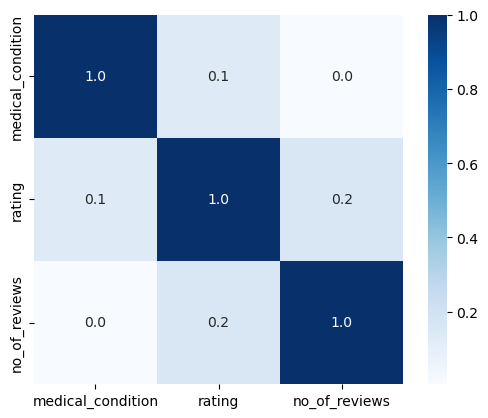

In [50]:
davgcorr=davg.corr()
sns.heatmap(davgcorr,cbar=True,square=True,fmt='0.1f',annot=True,cmap='Blues')

In [54]:
mc_countdf= dataset.groupby(by=['medical_condition']).size().reset_index(name="counts")
px.bar(data_frame=mc_countdf,x="medical_condition",y='counts',color=davg['rating'])

## Conclusions on Data

 The data is quite imbalanced, it seemed as though it caused the higher average rating, which occured in the OTC drugs. I would expect OTC drugs to be more affordable regulation wise, resulting in more reviews for OTC drugs but not in terms of rating. I expected Prescribed Drugs (Rx) to have less entries than the OTC drugs. This expectation however was proven wrong. This expectation is set because my idea that Rx drugs are used to treat specific medical conditions that should be rare compared to OTC drugs used to treat more common medical conditions. I do understand that some drugs require Rx despite the common medical conditions such as for acne, flue, etc due to the side effects it could bring and I just generalized them easily because I combined Rx/OTC with OTC due to its similarity on how to get those drugs. Despite having the highest rating, Swine Flu drugs has the lowest entry (5 entries) which I would say the high rating is caused by 'statistical coincidence'. No data rows were dropped or augmented to see how the dataset condition is as a whole. Only the removal of '%' in the activity column but unused. No correlations found between number of reviews, ratings, and medical_conditions.

## Reflections

Firstly, I enjoyed working with Jupyter notebook even though it needs one to get some practice in to master it which I am far from but I will definitely get there. One would normally choose Excel as the easiest because we’re so used to using it as it was my first time using Jupyter Notebook. 

Spreadsheet software like Excel is frequently used for data analysis, reporting, and visualization. It features a variety of built-in tools and functions for doing computations, making charts and graphs, and filtering and sorting data, as well as a user-friendly interface for generating and manipulating data tables, whereas Jupyter on the other hand. The web-based interactive computing environment Jupyter, on the other hand, enables users to create and share documents that include real-time code, equations, visuals, and narrative text.  Data exploration, prototyping, and collaboration are all done using it. Personally, I enjoyed working with Jupyter notebook even though it needs one to get some practice in to master it which I am far from it but I will definitely get there. One would normally choose Excel as the easiest because we’re so used to using it as it was my first time using Jupyter Notebook. 
When it comes to smaller data analysis tasks including making spreadsheets, organizing data, and carrying out simple computations, Excel is frequently utilized. It is frequently used in business and finance for tasks including forecasting, making charts and graphs, and budgeting, while a more versatile tool, frequently used for more difficult data analysis activities like statistical analysis, data visualization, and machine learning.
If I had more time, even though this might sound like a cliché, but I would definitely give myself more time, so I that I can fully understand what I am doing. Granted there are things that I have learned but I know that there is so much that I could have executed because I understand better.
As I was doing these assignments I learned that there so many stat concepts and I lack understanding of most of them. The lack of basic comprehension of statistical ideas like regression analysis, hypothesis testing, and probability make it difficult to understand statistical findings and derive reliable inferences from data.
